### Task 1 
### Group Data Traffickers - Vansh (23110351), Aditya (23110016), Soham (23110315)

**Q1 - Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form θ1x+θ0) for any given values of (θ0,θ1). [1 mark]**

In [1]:
import torch
import torch.autograd as autograd
import numpy as np

np.random.seed(45)
num_samples = 40

x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

x_tensor = torch.tensor(x1, dtype=torch.float32, requires_grad=True)
y_tensor = torch.tensor(y, dtype=torch.float32)

theta0 = torch.tensor(0.0, requires_grad=True)
theta1 = torch.tensor(0.0, requires_grad=True)

def model(x):
    return theta1 * x + theta0

y_pred = model(x_tensor)

loss = torch.mean((y_pred - y_tensor) ** 2)

loss.backward()

print(f'Gradient of theta0: {theta0.grad.item()}')
print(f'Gradient of theta1: {theta1.grad.item()}')


Gradient of theta0: -7.447054386138916
Gradient of theta1: -1.0253016948699951


**Q2 - Using the same (θ0,θ1) as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient. [1 mark]**

In [2]:
theta0_stochastic = torch.tensor(0.0, requires_grad=True)
theta1_stochastic = torch.tensor(0.0, requires_grad=True)

learning_rate = 0.01

def stochastic_gradient(x, y, theta0, theta1):
    y_pred = theta1 * x + theta0
    
    loss = (y_pred - y) ** 2

    loss.backward()

    return theta0.grad.item(), theta1.grad.item()

gradients_theta0 = []
gradients_theta1 = []

for i in range(num_samples):
    theta0_stochastic.grad = None
    theta1_stochastic.grad = None

    x_sample = x_tensor[i]
    y_sample = y_tensor[i]

    grad0, grad1 = stochastic_gradient(x_sample, y_sample, theta0_stochastic, theta1_stochastic)

    gradients_theta0.append(grad0)
    gradients_theta1.append(grad1)

avg_grad_theta0 = np.mean(gradients_theta0)
avg_grad_theta1 = np.mean(gradients_theta1)

print(f"Average Stochastic Gradient of theta0: {avg_grad_theta0}")
print(f"Average Stochastic Gradient of theta1: {avg_grad_theta1}")


Average Stochastic Gradient of theta0: -7.4470539569854735
Average Stochastic Gradient of theta1: -1.0253017988055944


Observation: The gradients are coming out to be nearly equal because:

True Gradient: This is computed over the entire dataset at once by summing (or averaging) the gradient contributions from all points in the dataset. This gives us the gradient of the loss function with respect to the parameters 𝜃0 and 𝜃1, considering all data points.

Stochastic Gradient: This is computed one point at a time for each data point in the dataset. When we take the average of all the stochastic gradients, we essentially sum up the gradient contributions from each data point and then divide by the number of points.

Since both approaches ultimately depend on the same data, the only difference between the two methods is how the gradients are computed (all at once for the true gradient, versus one point at a time for the stochastic gradient). When we average the stochastic gradients over all points, we effectively get the same result as the true gradient calculation because we are summing the same information, just in smaller pieces.



**Q3 - Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of 
ϵ (or ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.**

Epoch 1/15, Loss: 16.681486129760742
Epoch 2/15, Loss: 16.121837615966797
Epoch 3/15, Loss: 15.58355712890625
Epoch 4/15, Loss: 15.065797805786133
Epoch 5/15, Loss: 14.567756652832031
Epoch 6/15, Loss: 14.088655471801758
Epoch 7/15, Loss: 13.627744674682617
Epoch 8/15, Loss: 13.18431568145752
Epoch 9/15, Loss: 12.757676124572754
Epoch 10/15, Loss: 12.34716510772705
Epoch 11/15, Loss: 11.952150344848633
Epoch 12/15, Loss: 11.572023391723633
Epoch 13/15, Loss: 11.206198692321777
Epoch 14/15, Loss: 10.854117393493652
Epoch 15/15, Loss: 10.515237808227539
Epoch 1/15, Loss: 16.681486129760742
Epoch 2/15, Loss: 16.121837615966797
Epoch 3/15, Loss: 15.58355712890625
Epoch 4/15, Loss: 15.065797805786133
Epoch 5/15, Loss: 14.567756652832031
Epoch 6/15, Loss: 14.088655471801758
Epoch 7/15, Loss: 13.627744674682617
Epoch 8/15, Loss: 13.18431568145752
Epoch 9/15, Loss: 12.757676124572754
Epoch 10/15, Loss: 12.34716510772705
Epoch 11/15, Loss: 11.952150344848633
Epoch 12/15, Loss: 11.57202339172363

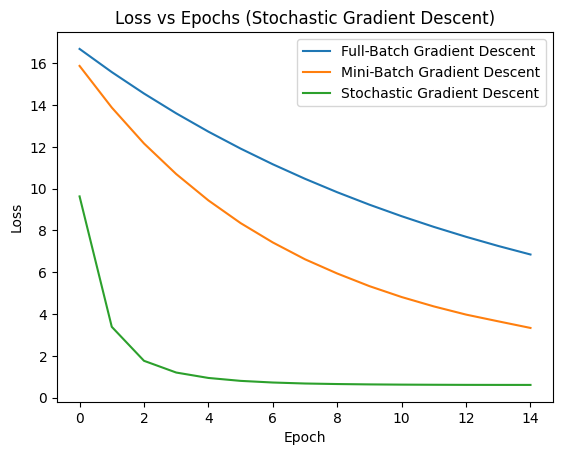

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(45)
num_samples = 40

x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

x_tensor = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

X = np.hstack([np.ones((num_samples, 1)), x1.reshape(-1, 1)])
optimal_theta = np.linalg.inv(X.T @ X) @ X.T @ y

def plot_loss(losses, method_name):
    plt.plot(losses, label=method_name)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss vs Epochs ({method_name})")
    plt.legend()

def full_batch_gradient_descent(x, y, optimal_theta, lr=0.02, epochs=15, epsilon=0.001):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    optimizer = optim.SGD([theta0, theta1], lr=lr)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad() #reset
        y_pred = theta1 * x + theta0
        loss = torch.mean((y_pred - y) ** 2)
        loss.backward() #gradient
        optimizer.step() #update theta
        losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

        if torch.abs(theta0 - optimal_theta[0]) < epsilon and torch.abs(theta1 - optimal_theta[1]) < epsilon:
            print(f"Converged at epoch {epoch+1}")
            break

    return losses

def mini_batch_gradient_descent(x, y, optimal_theta, batch_size=10, lr=0.01, epochs=15, epsilon=0.001):
    if batch_size is None:
        raise ValueError("batch size not given")
        
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    optimizer = optim.SGD([theta0, theta1], lr=lr)
    losses = []
    num_batches = len(x) // batch_size
    for epoch in range(epochs):
        perm = torch.randperm(len(x))
        batch_losses = []
        for i in range(0, len(x), batch_size):
            optimizer.zero_grad()
            indices = perm[i:i+batch_size]
            x_batch = x[indices]
            y_batch = y[indices]
            y_pred = theta1 * x_batch + theta0
            loss = torch.mean((y_pred - y_batch) ** 2)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())
        losses.append(np.mean(batch_losses))
        print(f"Epoch {epoch+1}/{epochs}, Loss: {np.mean(batch_losses)}")

        if torch.abs(theta0 - optimal_theta[0]) < epsilon and torch.abs(theta1 - optimal_theta[1]) < epsilon:
            print(f"Converged at epoch {epoch+1}")
            break

    return losses


def stochastic_gradient_descent(x, y, optimal_theta, lr=0.01, epochs=15, epsilon=0.001):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    optimizer = optim.SGD([theta0, theta1], lr=lr)
    losses = []
    for epoch in range(epochs):
        perm = torch.randperm(len(x))
        batch_losses = []
        for i in perm:
            optimizer.zero_grad()
            y_pred = theta1 * x[i] + theta0
            loss = (y_pred - y[i]) ** 2
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())
        losses.append(np.mean(batch_losses))
        print(f"Epoch {epoch+1}/{epochs}, Loss: {np.mean(batch_losses)}")

        if torch.abs(theta0 - optimal_theta[0]) < epsilon and torch.abs(theta1 - optimal_theta[1]) < epsilon:
            print(f"Converged at epoch {epoch+1}")
            break

    return losses

def run_trials(x, y, optimal_theta, method, trials=10, lr=0.01, epochs=15, epsilon=0.001, batch_size=None):
    total_epochs = []
    total_iterations = []
    for trial in range(trials):
        if method.__name__ == 'mini_batch_gradient_descent':
            losses = method(x, y, optimal_theta, lr=lr, epochs=epochs, epsilon=epsilon, batch_size=batch_size)
        else:
            losses = method(x, y, optimal_theta, lr=lr, epochs=epochs, epsilon=epsilon)
        
        num_epochs = len(losses)
        total_epochs.append(num_epochs)
        
        if method.__name__ == 'mini_batch_gradient_descent':
            num_iterations = num_epochs * (len(x) // batch_size)
        elif method.__name__ == 'stochastic_gradient_descent':
            num_iterations = num_epochs * len(x)
        else:
            num_iterations = num_epochs  # 1 epoch = 1 iteration for full-batch
        
        total_iterations.append(num_iterations)
    
    avg_epochs = np.mean(total_epochs)
    avg_iterations = np.mean(total_iterations)
    
    print(f"Average epochs for {method.__name__}: {avg_epochs}")
    print(f"Average iterations for {method.__name__}: {avg_iterations}")
    
    return avg_epochs, avg_iterations

avg_full_batch_epochs, avg_full_batch_iterations = run_trials(x_tensor, y_tensor, optimal_theta, full_batch_gradient_descent)
avg_mini_batch_epochs, avg_mini_batch_iterations = run_trials(x_tensor, y_tensor, optimal_theta, mini_batch_gradient_descent, batch_size=10)
avg_stochastic_epochs, avg_stochastic_iterations = run_trials(x_tensor, y_tensor, optimal_theta, stochastic_gradient_descent)




print("Running Full Batch Gradient Descent")
avg_full_batch_epochs = run_trials(x_tensor, y_tensor, optimal_theta, full_batch_gradient_descent)
print(f"Average epochs for full batch: {avg_full_batch_epochs}")
print(f"Average iterations for full batch: {avg_full_batch_iterations}")


print("Running Mini Batch Gradient Descent")
avg_mini_batch_epochs, avg_mini_batch_iterations = run_trials(x_tensor, y_tensor, optimal_theta, mini_batch_gradient_descent, batch_size=10)
print(f"Average epochs for mini batch: {avg_mini_batch_epochs}")
print(f"Average iterations for mini batch: {avg_mini_batch_iterations}")


print("Running Stochastic Gradient Descent")
avg_stochastic_epochs = run_trials(x_tensor, y_tensor, optimal_theta, stochastic_gradient_descent)
print(f"Average epochs for stochastic: {avg_stochastic_epochs}")
print(f"Average iterations for Stochastic: {avg_mini_batch_iterations}")


full_batch_losses = full_batch_gradient_descent(x_tensor, y_tensor, optimal_theta)
plot_loss(full_batch_losses, 'Full-Batch Gradient Descent')

mini_batch_losses = mini_batch_gradient_descent(x_tensor, y_tensor, optimal_theta, batch_size=10)
plot_loss(mini_batch_losses, 'Mini-Batch Gradient Descent')

stochastic_losses = stochastic_gradient_descent(x_tensor, y_tensor, optimal_theta)
plot_loss(stochastic_losses, 'Stochastic Gradient Descent')

plt.show()


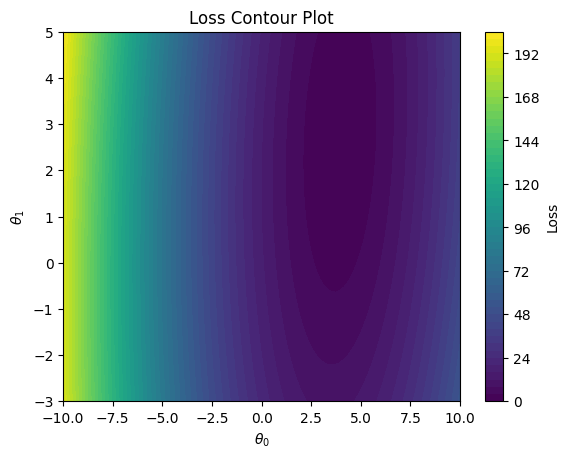

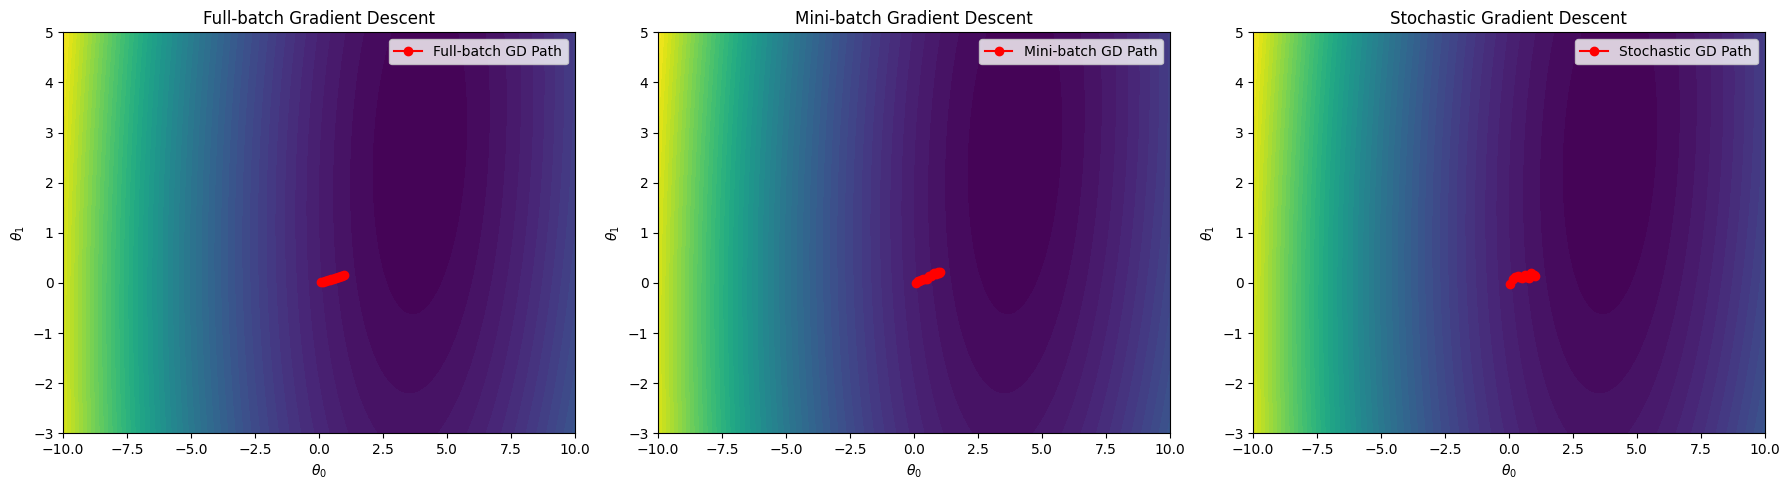

In [2]:
def compute_loss(theta0, theta1, x, y):
    y_pred = theta1 * x + theta0
    loss = torch.mean((y_pred - y) ** 2)
    return loss.item()

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-3, 5, 100)
loss_surface = np.zeros((100, 100))

for i, theta0_val in enumerate(theta0_vals):
    for j, theta1_val in enumerate(theta1_vals):
        loss_surface[i, j] = compute_loss(torch.tensor(theta0_val), torch.tensor(theta1_val), x_tensor, y_tensor)

theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
contour_plot = plt.contourf(theta0_grid, theta1_grid, loss_surface.T, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Loss Contour Plot')

def gradient_descent_with_convergence(x, y, method='full-batch', batch_size=None, lr=0.01, epochs=15, epsilon=0.001):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    optimizer = optim.SGD([theta0, theta1], lr=lr)

    theta0_updates = []
    theta1_updates = []
    prev_loss = float('inf')

    for epoch in range(epochs):
        optimizer.zero_grad()

        if method == 'full-batch':
            y_pred = theta1 * x + theta0
            loss = torch.mean((y_pred - y) ** 2)
        elif method == 'mini-batch':
            indices = torch.randperm(len(x))[:batch_size]
            x_batch, y_batch = x[indices], y[indices]
            y_pred = theta1 * x_batch + theta0
            loss = torch.mean((y_pred - y_batch) ** 2)
        elif method == 'stochastic':
            index = torch.randint(0, len(x), (1,))
            x_sample, y_sample = x[index], y[index]
            y_pred = theta1 * x_sample + theta0
            loss = (y_pred - y_sample) ** 2

        loss.backward()
        optimizer.step()

        theta0_updates.append(theta0.item())
        theta1_updates.append(theta1.item())

        if torch.abs(theta0 - optimal_theta[0]) < epsilon and torch.abs(theta1 - optimal_theta[1]) < epsilon:
            print(f"Converged at epoch {epoch+1}")
            break


    return theta0_updates, theta1_updates

methods = ['full-batch', 'mini-batch', 'stochastic']
batch_sizes = [None, 10, None]  

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(methods):
    batch_size = batch_sizes[i]
    theta0_updates, theta1_updates = gradient_descent_with_convergence(x_tensor, y_tensor, method=method, batch_size=batch_size, lr=0.01, epochs=15, epsilon=0.001)

    axs[i].contourf(theta0_grid, theta1_grid, loss_surface.T, levels=50, cmap='viridis')
    axs[i].plot(theta0_updates, theta1_updates, 'ro-', label=f'{method.capitalize()} GD Path')
    axs[i].set_xlabel(r'$\theta_0$')
    axs[i].set_ylabel(r'$\theta_1$')
    axs[i].set_title(f'{method.capitalize()} Gradient Descent')
    axs[i].legend()

plt.tight_layout()
plt.show()

Which optimization process takes a larger number of epochs to converge, and why?

Full-batch gradient descent takes the most epochs to converge.

Full-Batch Gradient Descent computes the gradient over the entire dataset for every update. This ensures accurate gradient updates but slows down the optimization process as each epoch requires processing the entire dataset.

So, full-batch gradient descent takes more epochs to converge due to the high computational load per epoch and the slower, more stable update process compared to the faster, noisier updates of mini-batch and stochastic gradient descent.

Q4 - Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighbourhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.

Epoch 1/15, Loss: 16.681486129760742, Gradient: (-7.447054386138916, -1.0253016948699951), Momentum: (-0.07447054386138917, -0.010253016948699952)
Epoch 2/15, Loss: 16.121837615966797, Gradient: (-7.2998504638671875, -1.0314390659332275), Momentum: (-0.14002199411392213, -0.019542105913162234)
Epoch 3/15, Loss: 15.09880542755127, Gradient: (-7.023116111755371, -1.042811632156372), Momentum: (-0.19625095582008362, -0.028016011643409732)
Epoch 4/15, Loss: 13.729127883911133, Gradient: (-6.635359764099121, -1.0583553314208984), Momentum: (-0.24297945787906647, -0.035797963793277744)
Epoch 5/15, Loss: 12.136953353881836, Gradient: (-6.155463695526123, -1.076898455619812), Momentum: (-0.2802361490464211, -0.04298715197014809)
Epoch 6/15, Loss: 10.442753791809082, Gradient: (-5.602272987365723, -1.0972108840942383), Momentum: (-0.3082352640154362, -0.049660545614075666)
Epoch 7/15, Loss: 8.754642486572266, Gradient: (-4.994213581085205, -1.1180500984191895), Momentum: (-0.32735387342474465, 

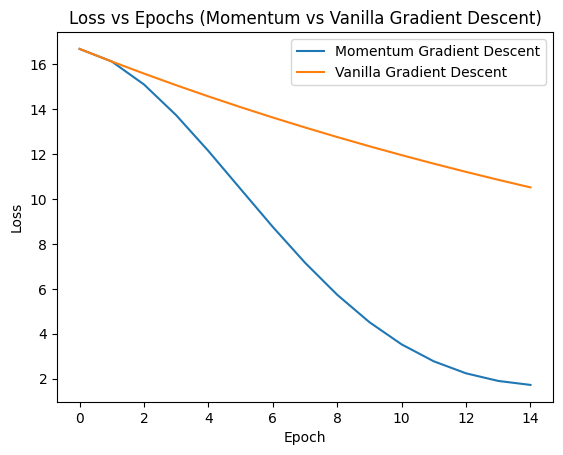

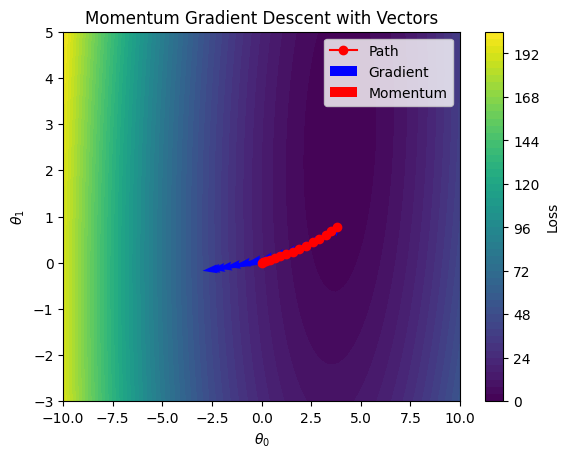

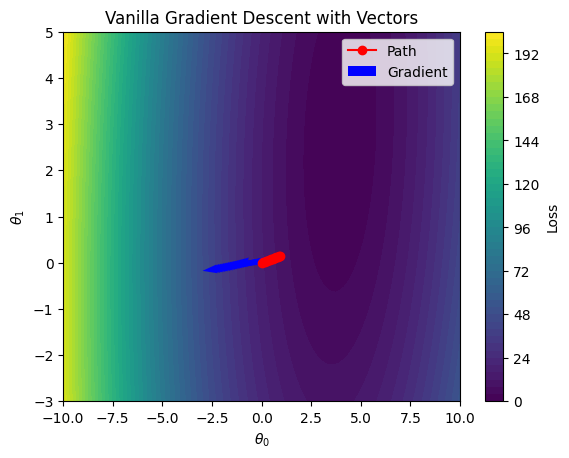

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)

num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

x_tensor = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

def compute_loss(theta0, theta1, x, y):
    y_pred = theta1 * x + theta0
    loss = torch.mean((y_pred - y) ** 2)
    return loss

def gradient_descent_momentum(x, y, lr=0.01, momentum=0.9, epochs=15, epsilon=0.001):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    v0, v1 = 0, 0 
    losses = []
    theta0_updates, theta1_updates = [], []
    gradients, momentums = [], []
    steps = 0 

    for epoch in range(epochs):
        theta0.grad = None
        theta1.grad = None

        loss = compute_loss(theta0, theta1, x, y)
        if len(losses) > 0 and abs(losses[-1] - loss.item()) < epsilon:
            break  

        loss.backward()

        grad0, grad1 = theta0.grad.item(), theta1.grad.item()
        v0 = momentum * v0 + lr * grad0
        v1 = momentum * v1 + lr * grad1

        gradients.append((grad0, grad1))
        momentums.append((v0, v1))
        theta0_updates.append(theta0.item())
        theta1_updates.append(theta1.item())

        theta0.data -= v0
        theta1.data -= v1

        losses.append(loss.item())
        steps += 1 
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Gradient: ({grad0}, {grad1}), Momentum: ({v0}, {v1})')

    return theta0_updates, theta1_updates, losses, gradients, momentums, steps

theta0_momentum, theta1_momentum, momentum_losses, gradients, momentums, momentum_steps = gradient_descent_momentum(x_tensor, y_tensor)

def vanilla_gradient_descent(x, y, lr=0.01, epochs=15, epsilon=0.001):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    losses = []
    theta0_updates, theta1_updates = [], []
    gradients = []
    steps = 0  

    for epoch in range(epochs):
        theta0.grad = None
        theta1.grad = None
        loss = compute_loss(theta0, theta1, x, y)
        
        if len(losses) > 0 and abs(losses[-1] - loss.item()) < epsilon:
            break  

        loss.backward()

        grad0, grad1 = theta0.grad.item(), theta1.grad.item()

        gradients.append((grad0, grad1))
        theta0_updates.append(theta0.item())
        theta1_updates.append(theta1.item())

        theta0.data -= lr * grad0
        theta1.data -= lr * grad1

        losses.append(loss.item())
        steps += 1  
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Gradient: ({grad0}, {grad1})')

    return theta0_updates, theta1_updates, losses, gradients, steps

theta0_vanilla, theta1_vanilla, vanilla_losses, vanilla_gradients, vanilla_steps = vanilla_gradient_descent(x_tensor, y_tensor)

plt.plot(momentum_losses, label="Momentum Gradient Descent")
plt.plot(vanilla_losses, label="Vanilla Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs (Momentum vs Vanilla Gradient Descent)")
plt.show()

def plot_contour_with_vectors(theta0_updates, theta1_updates, gradients, momentums, title, method='momentum'):
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-3, 5, 100)
    loss_surface = np.zeros((100, 100))

    for i, theta0_val in enumerate(theta0_vals):
        for j, theta1_val in enumerate(theta1_vals):
            loss_surface[i, j] = compute_loss(torch.tensor(theta0_val), torch.tensor(theta1_val), x_tensor, y_tensor)

    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
    plt.contourf(theta0_grid, theta1_grid, loss_surface.T, levels=50, cmap='viridis')
    plt.colorbar(label='Loss')

    plt.plot(theta0_updates, theta1_updates, 'ro-', label='Path')

    for i in range(len(theta0_updates)):
        plt.quiver(theta0_updates[i], theta1_updates[i], gradients[i][0], gradients[i][1], color='blue', scale=50, label='Gradient' if i == 0 else "")
        if method == 'momentum':
            plt.quiver(theta0_updates[i], theta1_updates[i], momentums[i][0], momentums[i][1], color='red', scale=50, label='Momentum' if i == 0 else "")

    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(title)
    plt.legend()
    plt.show()

plot_contour_with_vectors(theta0_momentum, theta1_momentum, gradients, momentums, "Momentum Gradient Descent with Vectors", method='momentum')

plot_contour_with_vectors(theta0_vanilla, theta1_vanilla, vanilla_gradients, None, "Vanilla Gradient Descent with Vectors", method='vanilla')


Momentum Gradient Descent is much more efficient at minimizing the loss function, with faster convergence and a smoother trajectory.

Vanilla Gradient Descent converges more slowly and exhibits more oscillations in the trajectory, indicating that it might struggle with certain types of loss surfaces, especially those with steep gradients or noisy areas.